# 딥러닝을 활용하여 강아지 구별해보기

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -q -U tf-hub-nightly

In [4]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [5]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [6]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [7]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [8]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [9]:
from IPython.display import Image
Dog=Image('/content/drive/MyDrive/Colab Notebooks/강아지.JPG')

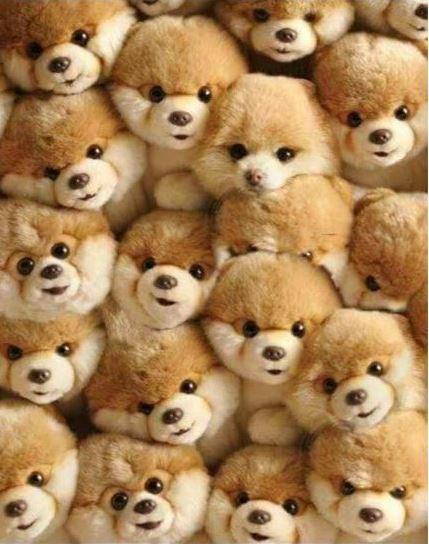

In [10]:
Dog

#강아지 사진 불러오기


출처: 이미지 파일 업로드하고 전처리하여 시각화 하는 방법

https://rfriend.tistory.com/431


In [11]:
# 구글 드라이브로 mount 해오는 방법
from IPython.display import Image
Dog=Image('/content/drive/MyDrive/Colab Notebooks/강아지.JPG')

In [ ]:
# Local로 올리는 방법
#from google.colab import files
#Dog=files.upload()

In [13]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [20]:
path_dir="/content/drive/MyDrive/Colab Notebooks"

In [22]:
file_list = os.listdir(path_dir)

In [23]:
file_list

['강아지.JPG', '딥러닝을활용하여강아지구별학습.ipynb']

In [26]:
file_list[0]

'강아지.JPG'

In [30]:
img_name = '강아지.JPG'

img_path = os.path.join(path_dir, img_name)

In [31]:
 from keras.preprocessing import image

In [32]:
# Preprocess the image into a 4D tensor Using keras.preprocessing
img = image.load_img(img_path, target_size=(250, 250))

img_tensor = image.img_to_array(img)

In [33]:
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor.shape

(1, 250, 250, 3)

In [34]:
# Scaling into [0,1]
img_tensor /= 255.  

In [43]:
img_tensor[0].shape

(250, 250, 3)

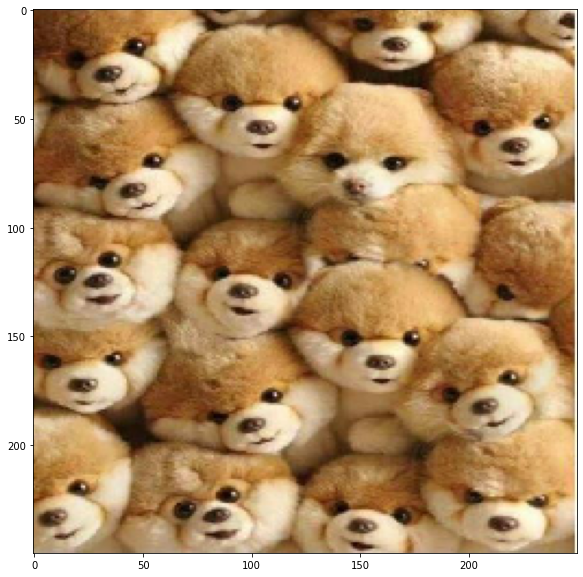

In [37]:
# Image show
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10) # set figure size
plt.imshow(img_tensor[0])
plt.show()

In [38]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [39]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer= optimizers.RMSprop(learning_rate = 1e-4), metrics = ['acc'])

In [48]:
history = model.fit_generator(
    img_tensor,
    steps_per_epoch = 100,
    epochs = 50)

Epoch 1/50


ValueError: ignored